In [12]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score, f1_score, auc,roc_auc_score,cohen_kappa_score,matthews_corrcoef

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_frame = pd.read_csv("/content/drive/MyDrive/parkinsons.data")

In [4]:
num_0 = (data_frame["status"] == 0).sum()
num_1 = (data_frame["status"] == 1).sum()

print("number of rows with class0:",num_0)
print("number of rows with class1:",num_1)

number of rows with class0: 48
number of rows with class1: 147


In [5]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import numpy as np

# Assuming 'data_frame' is your DataFrame containing the data

# Step 1: Balancing using SMOTE+TOMEK
resample2 = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x = data_frame.drop(["status", "name"], axis=1)
y = data_frame["status"]
x_res2, y_res2 = resample2.fit_resample(x, y)

# Step 2: Augmentation
data = np.column_stack((x_res2, y_res2))

x_balanced = data[:, :-1]
y_balanced = data[:, -1]

num_samples_to_add = 600

additional_samples_indices = np.concatenate([
    np.random.choice(np.where(y_balanced == 0)[0], num_samples_to_add // 2, replace=True),
    np.random.choice(np.where(y_balanced == 1)[0], num_samples_to_add // 2, replace=True)
])

x_augmented = np.vstack([x_balanced, x_balanced[additional_samples_indices]])
y_augmented = np.hstack([y_balanced, y_balanced[additional_samples_indices]])

print("Number of samples after augmentation:")
print("Class 0:", np.sum(y_augmented == 0))
print("Class 1:", np.sum(y_augmented == 1))

Number of samples after augmentation:
Class 0: 444
Class 1: 447


# mRMR Feature Selection

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'data_frame' is your DataFrame
X = data_frame.drop(['status', 'name'], axis=1)
y = data_frame['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_augmented, y_augmented, test_size=0.2, random_state=42)

In [7]:
!pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 935.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390257 sha256=64b9d7d1f939a8323b7a1b5f626f4bb9e8e6a28555278119c20a4399e24e4e09
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


In [8]:
#om sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from pymrmr import mRMR

# Load the Iris dataset
X = data_frame.drop('name', axis=1)
X = X.drop('status', axis=1)
y = data_frame['status']

feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',  'NHR',  'HNR',  'RPDE', 'DFA',  'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names
# Combine features and target variable into a DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=feature_names + ['status'])

# Extract features and target variable
features = df.drop('status', axis=1)
target = df['status']

# Use mRMR for feature selection
num_features_to_select = 19  # Choose the number of features to select
selected_features = mRMR(df, 'MIQ', num_features_to_select)

# Display the selected features
print(f'Selected Features: {selected_features}')

# Create a new DataFrame with the selected features
selected_df = df[selected_features + ['status']]

# Display the selected DataFrame
print(selected_df.head())

Selected Features: ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'status', 'HNR', 'D2', 'spread1', 'MDVP:Shimmer(dB)', 'spread2', 'PPE', 'MDVP:Jitter(Abs)', 'RPDE', 'MDVP:Jitter(%)', 'NHR', 'DFA', 'Jitter:DDP', 'MDVP:RAP', 'MDVP:Shimmer', 'Shimmer:DDA', 'MDVP:APQ']
   MDVP:Fhi(Hz)  MDVP:Flo(Hz)  status     HNR        D2   spread1  \
0       157.302        74.997     1.0  21.033  2.301442 -4.813031   
1       148.650       113.819     1.0  19.085  2.486855 -4.075192   
2       131.111       111.555     1.0  20.651  2.342259 -4.443179   
3       137.871       111.366     1.0  20.644  2.405554 -4.117501   
4       141.781       110.655     1.0  19.649  2.332180 -3.747787   

   MDVP:Shimmer(dB)   spread2       PPE  MDVP:Jitter(Abs)      RPDE  \
0             0.426  0.266482  0.284654           0.00007  0.414783   
1             0.626  0.335590  0.368674           0.00008  0.458359   
2             0.482  0.311173  0.332634           0.00009  0.429895   
3             0.517  0.334147  0.368975         

In [9]:
X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']

feature_names=['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'status', 'HNR', 'D2', 'spread1', 'MDVP:Shimmer(dB)', 'spread2', 'PPE', 'MDVP:Jitter(Abs)', 'RPDE', 'MDVP:Jitter(%)', 'NHR', 'DFA', 'Jitter:DDP', 'MDVP:RAP', 'MDVP:Shimmer', 'Shimmer:DDA', 'MDVP:APQ']

columns = feature_names
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# mRMR + Bagging

Accuracy on the test set: 0.8974358974358975
Accuracy: 0.8974358974358975
Precision: 0.9375
Recall: 0.9375
F1-score: 0.9375
Confusion Matrix:


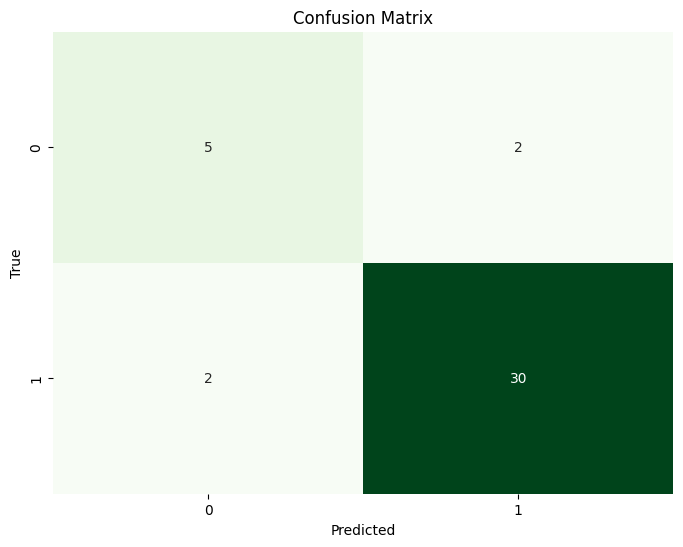

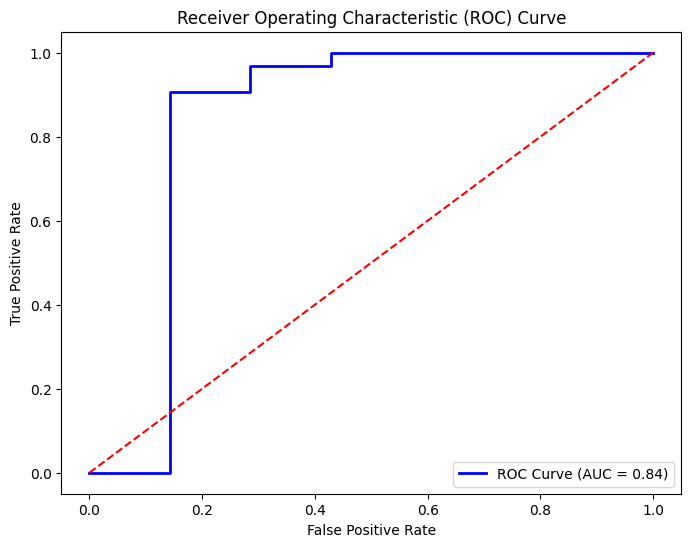

Accuracy: 0.8974 Precision: 0.9375 Recall: 0.9375 F1 Score: 0.9375 AUC Score: 0.8259 MCC: 0.6518 Kappa: 0.6518
Specificity: 0.7143


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Define the base classifier
base_classifier = DecisionTreeClassifier(max_depth=5)  # You can use any classifier here

# Create a Bagging Classifier
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy, precision, recall, F1-score, and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
#print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Plot ROC curve
y_pred_prob = bagging_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)

# mRMR + Boosting

Accuracy: 0.8717948717948718
Confusion Matrix:
[[ 4  3]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39

Accuracy: 0.8717948717948718
Precision: 0.9090909090909091
Recall: 0.9375
F1-score: 0.923076923076923
Confusion Matrix:


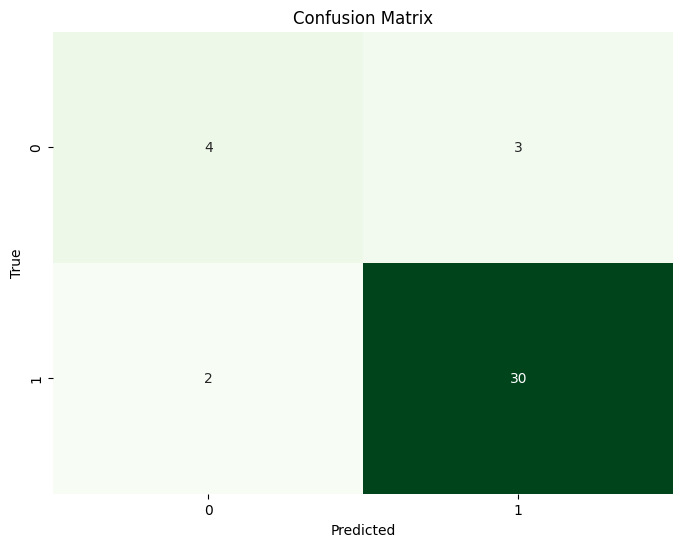

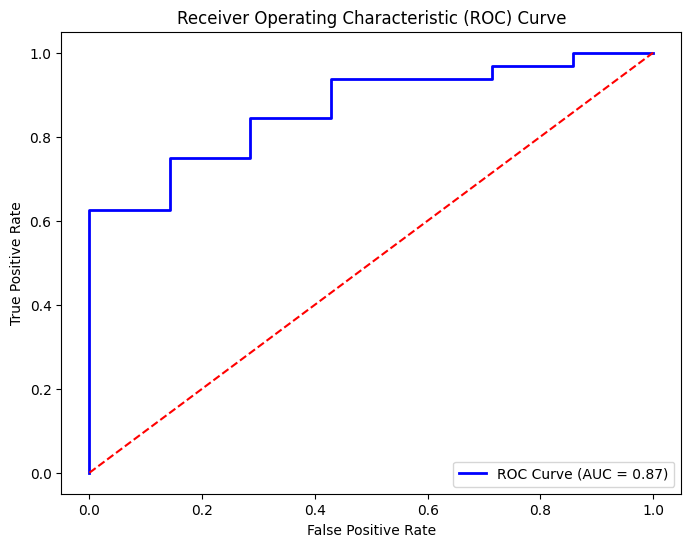

Accuracy: 0.8718 Precision: 0.9091 Recall: 0.9375 F1 Score: 0.9231 AUC Score: 0.7545 MCC: 0.5413 Kappa: 0.5390
Specificity: 0.5714


In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a base Decision Tree classifier (a weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the hyperparameters

# Create an AdaBoost classifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy, precision, recall, F1-score, and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
#print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Plot ROC curve
y_pred_prob = adaboost_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)

# mRMR + Stacking

Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Accuracy: 0.9487179487179487
Precision: 0.9411764705882353
Recall: 1.0
F1-score: 0.9696969696969697
Confusion Matrix:


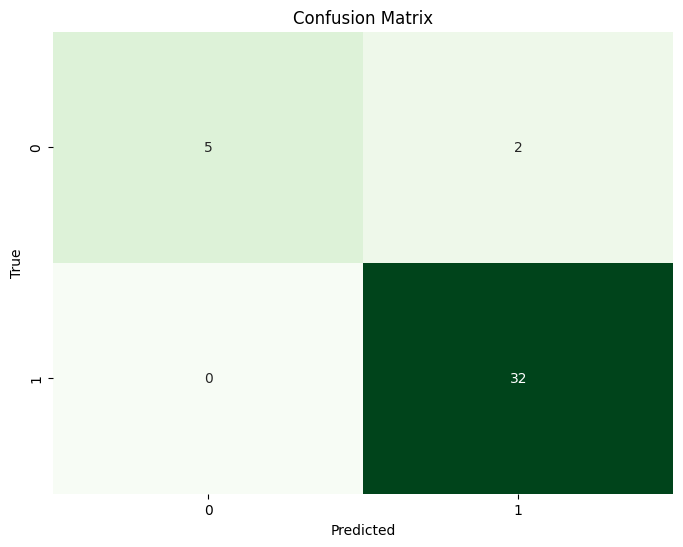

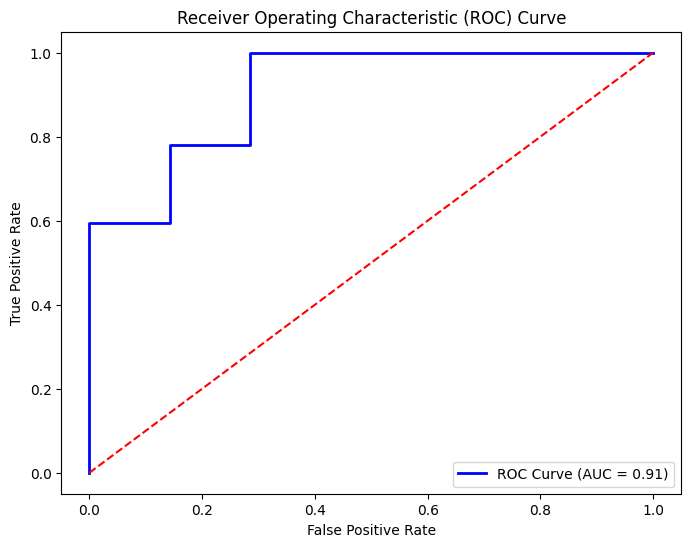

Accuracy: 0.9487 Precision: 0.9412 Recall: 1.0000 F1 Score: 0.9697 AUC Score: 0.8571 MCC: 0.8199 Kappa: 0.8040
Specificity: 0.7143


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy, precision, recall, F1-score, and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
#print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Plot ROC curve
y_pred_prob = stacking_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)

# mRMR + Voting

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the test set with selected features: 0.8717948717948718
Accuracy: 0.8717948717948718
Precision: 0.8857142857142857
Recall: 0.96875
F1-score: 0.9253731343283582
Confusion Matrix:


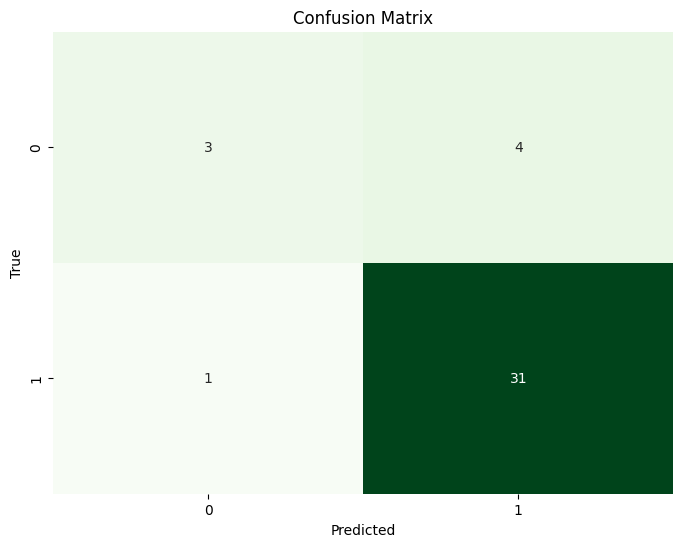

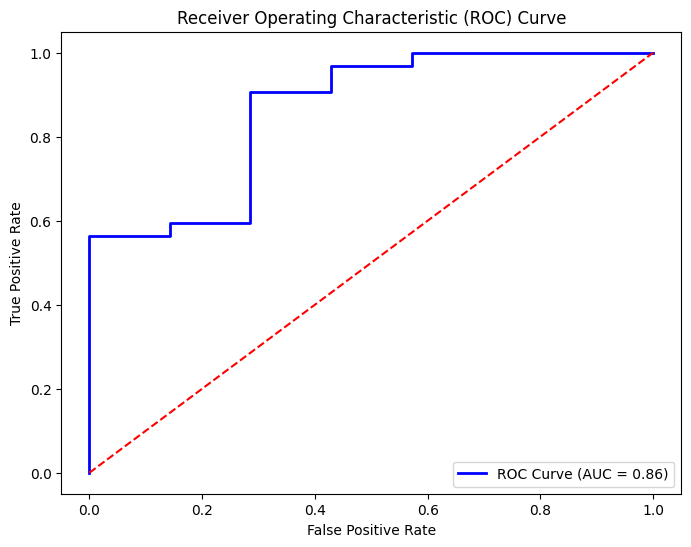

Accuracy: 0.8718 Precision: 0.8857 Recall: 0.9688 F1 Score: 0.9254 AUC Score: 0.6987 MCC: 0.5026 Kappa: 0.4772
Specificity: 0.4286


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the base classifiers
log_reg_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier(max_depth=5)
svm_clf = SVC(kernel='linear', probability=True)

# Create a Voting Classifier using the base classifiers
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg_clf), ('dt', decision_tree_clf), ('svm', svm_clf)],
    voting='soft'  # Use 'soft' voting to get class probabilities
)

# Train the Voting Classifier on the training data with selected features
voting_clf.fit(X_train, y_train)

# Make predictions on the test set with selected features
y_pred = voting_clf.predict(X_test)

# Evaluate the performance of the classifier with selected features
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with selected features: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy, precision, recall, F1-score, and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
#print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


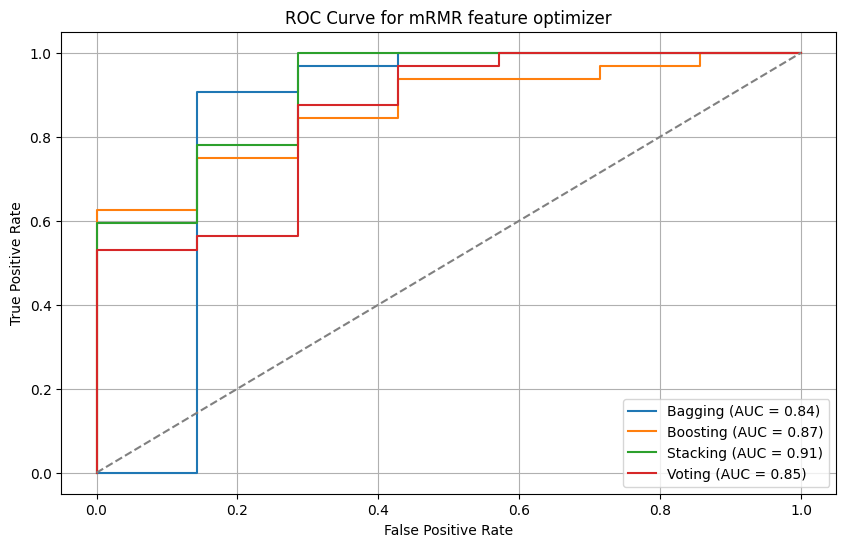

In [20]:

from sklearn.metrics import roc_curve, auc
# Initialize classifiers
classifiers = {
    "Bagging": bagging_clf,
    "Boosting": adaboost_classifier,
    "Stacking": stacking_classifier,
    "Voting": voting_clf
}

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for mRMR feature optimizer')
plt.legend()
plt.grid(True)
plt.show()